<a href="https://colab.research.google.com/github/krisnaaquino/dados/blob/main/Projeto_SIM_Versao2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**MINING HEALTH –   MINERAÇÃO DE DADOS PARA PREDIÇÃO E DIAGNÓSTICO PRECOCE DE DOENÇAS **



**Sistema de Informação sobre Mortalidade – SIM**

O Sistema de Informação sobre Mortalidade (SIM), desenvolvido pelo Ministério da Saúde em 1975, é produto da unificação de mais de quarenta modelos de Declaração de Óbito utilizados ao longo dos anos, para coletar dados sobre mortalidade no país. Com sua longa série temporal, o SIM é um patrimônio nacional, visto que possui informações fundamentais para que possamos conhecer os aspectos referentes à mortalidade no Brasil e às causas de adoecimento que levaram ao óbito. É, ainda, **um dos principais instrumentos para apoiar a elaboração de políticas públicas de saúde e seguridade social mais efetivas visando à prevenção, promoção e cuidado em saúde.**


Base de Dados: Base de Registros de 2022 - prévia
https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO22OPEN.csv



Dicionário de dados:
https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral+-+Estrutura.pdf

head() irá mostrar por padrão as 5 primeiras linhas do que existe dentro de um conjunto de dados dentro de um objeto do pandas

In [ ]:
import pandas as pd
#(importando arquivo csv completo)
dados = pd.read_csv("https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2020.csv",  sep=";")



<ipython-input-1-85f47f7d4f22>:3: DtypeWarning: Columns (66,79) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv("https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2020.csv",  sep=";")


In [ ]:
import pandas as pd
#importando arquivo csv com os atributos selecionados
dados = pd.read_csv("https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2020.csv", usecols =['CODMUNRES','CAUSABAS','CODMUNNATU','IDADE','SEXO','RACACOR','ESTCIV', 'ESC','ESC2010','OCUP','CODMUNRES','CODMUNOCOR','LOCOCOR','ATESTADO'],sep=';' )
dados.head()

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO
0,120010.0,487,1,4.0,3.0,2.0,1.0,999993.0,120025,1,120010,R99,R99
1,120010.0,468,2,4.0,1.0,2.0,1.0,999993.0,120010,5,120010,K869,I219/K86/T93
2,120010.0,459,2,4.0,1.0,2.0,1.0,999992.0,120025,1,120010,K721,N19/K721*F99
3,120010.0,477,2,4.0,9.0,1.0,0.0,999993.0,120010,1,120010,B342,B342 U071/J960/J180*J440
4,120030.0,484,2,4.0,3.0,1.0,0.0,999993.0,120010,1,120010,J969,J96/J15/N18*E10


O comando inverso ao head() é o tail(), que irá mostrar as 5 últimas linhas do DataFrame por padrão:

In [ ]:
dados.tail

<bound method NDFrame.tail of          CODMUNNATU  IDADE  SEXO  RACACOR  ESTCIV  ESC  ESC2010      OCUP  \
0          120010.0    487     1      4.0     3.0  2.0      1.0  999993.0   
1          120010.0    468     2      4.0     1.0  2.0      1.0  999993.0   
2          120010.0    459     2      4.0     1.0  2.0      1.0  999992.0   
3          120010.0    477     2      4.0     9.0  1.0      0.0  999993.0   
4          120030.0    484     2      4.0     3.0  1.0      0.0  999993.0   
...             ...    ...   ...      ...     ...  ...      ...       ...   
1556819    316960.0    491     2      4.0     4.0  2.0      1.0  999993.0   
1556820    172100.0    224     1      1.0     NaN  NaN      NaN       NaN   
1556821    261580.0    465     1      2.0     9.0  9.0      9.0  621005.0   
1556822    410830.0    438     1      4.0     5.0  4.0      3.0       NaN   
1556823    170300.0    449     1      4.0     1.0  1.0      0.0  513405.0   

         CODMUNRES  LOCOCOR  CODMUNOCOR CAUSA

In [ ]:
dados.shape

(1556824, 13)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556824 entries, 0 to 1556823
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   CODMUNNATU  1446983 non-null  float64
 1   IDADE       1556824 non-null  int64  
 2   SEXO        1556824 non-null  int64  
 3   RACACOR     1516188 non-null  float64
 4   ESTCIV      1475822 non-null  float64
 5   ESC         1442466 non-null  float64
 6   ESC2010     1437863 non-null  float64
 7   OCUP        1306818 non-null  float64
 8   CODMUNRES   1556824 non-null  int64  
 9   LOCOCOR     1556824 non-null  int64  
 10  CODMUNOCOR  1556824 non-null  int64  
 11  CAUSABAS    1556824 non-null  object 
 12  ATESTADO    1556824 non-null  object 
dtypes: float64(6), int64(5), object(2)
memory usage: 154.4+ MB


In [ ]:
dados.dtypes

CODMUNNATU    float64
IDADE           int64
SEXO            int64
RACACOR       float64
ESTCIV        float64
ESC           float64
ESC2010       float64
OCUP          float64
CODMUNRES       int64
LOCOCOR         int64
CODMUNOCOR      int64
CAUSABAS       object
ATESTADO       object
dtype: object

In [ ]:
dados.columns

Index(['CODMUNNATU', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010',
       'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODMUNOCOR', 'CAUSABAS', 'ATESTADO'],
      dtype='object')

Um comando muito útil para avaliar uma Series é o .describe(), que irá calcular os quartis, valores máximo, mínimo, a média e o desvio padrão.

In [ ]:
dados.describe()

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR
count,1.446983e+06,1.556824e+06,1.556824e+06,1.516188e+06,1.475822e+06,1.442466e+06,1.437863e+06,1.306818e+06,1.556824e+06,1.556824e+06,1.556824e+06
mean,3.161257e+05,4.629315e+02,1.437684e+00,2.309993e+00,2.569477e+00,3.508702e+00,2.532773e+00,7.820124e+05,3.264008e+05,1.707201e+00,3.265191e+05
std,8.347765e+04,4.829738e+01,4.969167e-01,1.428749e+00,1.776859e+00,2.354680e+00,2.734920e+00,2.680703e+05,8.893656e+04,1.104384e+00,8.891174e+04
min,1.100000e+05,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.010500e+04,1.100000e+05,1.000000e+00,1.100010e+05
25%,2.608450e+05,4.560000e+02,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,6.210050e+05,2.704300e+05,1.000000e+00,2.704300e+05
50%,3.144600e+05,4.700000e+02,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,9.999910e+05,3.304200e+05,1.000000e+00,3.304550e+05
75%,3.548500e+05,4.820000e+02,2.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,9.999930e+05,3.550300e+05,3.000000e+00,3.550300e+05
max,5.300100e+05,9.990000e+02,2.000000e+00,5.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.999950e+05,5.300100e+05,9.000000e+00,5.300100e+05


# Idade do falecido em minutos, horas, dias, meses ou anos. (Idade: composto de dois subcampos. - O primeiro, de 1 dígito, indica a unidade da idade (se 1 = minuto, se 2 = hora, se 3 = mês, se 4 = ano, se = 5 idade maior que 100 anos). - O segundo, de dois dígitos, indica a quantidade de unidades: Idade menor de 1 hora: subcampo varia de 01 e 59 (minutos); De 1 a 23 Horas: subcampo varia de 01 a 23 (horas); De 24 horas e 29 dias: subcampo varia de 01 a 29 (dias); De 1 a menos de 12 meses completos: subcampo varia de 01 a 11 (meses); Anos - subcampo varia de 00 a 99; - 9 - ignorado)

In [ ]:
#SELECIONAR  IDADE 400
dados.query('IDADE>=400 and IDADE<=600' ,inplace=True)

In [ ]:
maxIdade = dados['IDADE'].max()
maxIdade

525

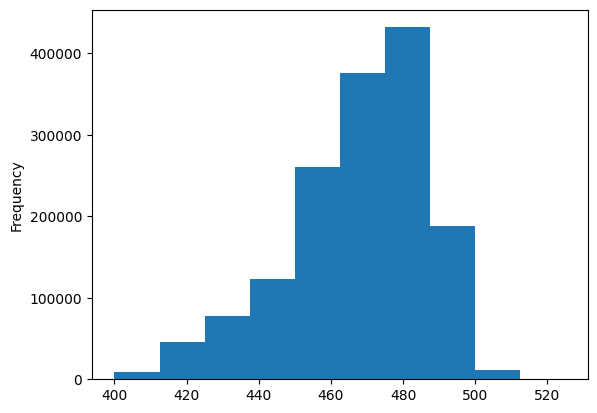

In [ ]:
dados.IDADE.plot.hist();

SUBTRAIR 400 IDADE

In [ ]:
dados['IDADE2']=dados['IDADE'].apply(lambda x: x-400 if x >=400 else x)


In [ ]:
dados.IDADE2.describe()

count    1.523005e+06
mean     6.747219e+01
std      1.913440e+01
min      0.000000e+00
25%      5.700000e+01
50%      7.100000e+01
75%      8.200000e+01
max      1.250000e+02
Name: IDADE2, dtype: float64

In [ ]:
maxIdade2 = dados['IDADE2'].max()
maxIdade2

125

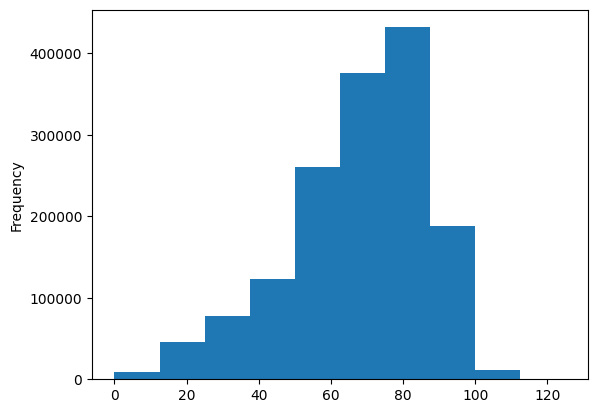

In [ ]:
dados.IDADE2.plot.hist();

In [ ]:
minIdade2 = dados['IDADE2'].min()
minIdade2

0

<Axes: xlabel='SEXO', ylabel='CODMUNOCOR'>

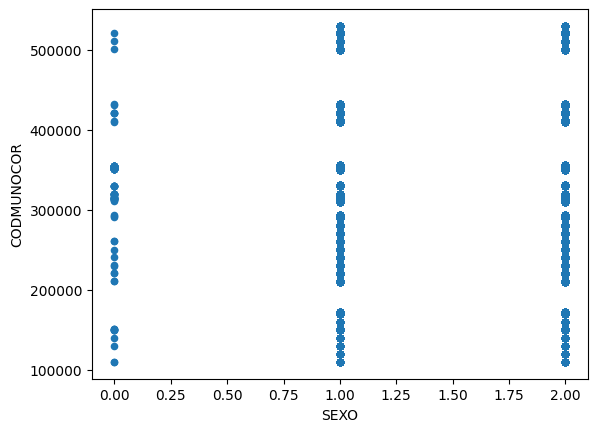

In [ ]:
dados.plot.scatter(x='SEXO',y='CODMUNOCOR')

In [ ]:
import seaborn as sns
sns.jointplot(data=dados,x='CODMUNOCOR',y='IDADE2',hue='SEXO')

In [ ]:
dados.isnull().sum()

CODMUNNATU    106571
IDADE              0
SEXO               0
RACACOR        37466
ESTCIV         48386
ESC            81740
ESC2010        86250
OCUP          216771
CODMUNRES          0
LOCOCOR            0
CODMUNOCOR         0
CAUSABAS           0
ATESTADO           0
IDADE2             0
dtype: int64

#Eliminando valores vazios

In [ ]:
dados.dropna(axis=0, how='all')

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO,IDADE2
0,120010.0,487,1,4.0,3.0,2.0,1.0,999993.0,120025,1,120010,R99,R99,87
1,120010.0,468,2,4.0,1.0,2.0,1.0,999993.0,120010,5,120010,K869,I219/K86/T93,68
2,120010.0,459,2,4.0,1.0,2.0,1.0,999992.0,120025,1,120010,K721,N19/K721*F99,59
3,120010.0,477,2,4.0,9.0,1.0,0.0,999993.0,120010,1,120010,B342,B342 U071/J960/J180*J440,77
4,120030.0,484,2,4.0,3.0,1.0,0.0,999993.0,120010,1,120010,J969,J96/J15/N18*E10,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556818,171820.0,488,1,4.0,4.0,5.0,5.0,621005.0,172100,1,172100,I639,R570/I639*I10,88
1556819,316960.0,491,2,4.0,4.0,2.0,1.0,999993.0,172100,1,172100,I64,A419/J159/I64,91
1556821,261580.0,465,1,2.0,9.0,9.0,9.0,621005.0,171420,3,171420,R99,R99,65
1556822,410830.0,438,1,4.0,5.0,4.0,3.0,NaN,172100,3,172100,X994,T794/T792/S279 S369/X994,38


In [ ]:
dados.dropna(axis=1, how='any')

,IDADE,SEXO,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO,IDADE2
0,487,1,120025,1,120010,R99,R99,87
1,468,2,120010,5,120010,K869,I219/K86/T93,68
2,459,2,120025,1,120010,K721,N19/K721*F99,59
3,477,2,120010,1,120010,B342,B342 U071/J960/J180*J440,77
4,484,2,120010,1,120010,J969,J96/J15/N18*E10,84
...,...,...,...,...,...,...,...,...
1556818,488,1,172100,1,172100,I639,R570/I639*I10,88
1556819,491,2,172100,1,172100,I64,A419/J159/I64,91
1556821,465,1,171420,3,171420,R99,R99,65
1556822,438,1,172100,3,172100,X994,T794/T792/S279 S369/X994,38


In [ ]:
dados.dropna(axis=0, how='any')

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO,IDADE2
0,120010.0,487,1,4.0,3.0,2.0,1.0,999993.0,120025,1,120010,R99,R99,87
1,120010.0,468,2,4.0,1.0,2.0,1.0,999993.0,120010,5,120010,K869,I219/K86/T93,68
2,120010.0,459,2,4.0,1.0,2.0,1.0,999992.0,120025,1,120010,K721,N19/K721*F99,59
3,120010.0,477,2,4.0,9.0,1.0,0.0,999993.0,120010,1,120010,B342,B342 U071/J960/J180*J440,77
4,120030.0,484,2,4.0,3.0,1.0,0.0,999993.0,120010,1,120010,J969,J96/J15/N18*E10,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556817,171820.0,453,1,1.0,2.0,3.0,2.0,715615.0,171820,1,172100,J159,A419/J159*B342 U072,53
1556818,171820.0,488,1,4.0,4.0,5.0,5.0,621005.0,172100,1,172100,I639,R570/I639*I10,88
1556819,316960.0,491,2,4.0,4.0,2.0,1.0,999993.0,172100,1,172100,I64,A419/J159/I64,91
1556821,261580.0,465,1,2.0,9.0,9.0,9.0,621005.0,171420,3,171420,R99,R99,65


In [ ]:
dados.dropna(axis=1,how='all')

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO,IDADE2
0,120010.0,487,1,4.0,3.0,2.0,1.0,999993.0,120025,1,120010,R99,R99,87
1,120010.0,468,2,4.0,1.0,2.0,1.0,999993.0,120010,5,120010,K869,I219/K86/T93,68
2,120010.0,459,2,4.0,1.0,2.0,1.0,999992.0,120025,1,120010,K721,N19/K721*F99,59
3,120010.0,477,2,4.0,9.0,1.0,0.0,999993.0,120010,1,120010,B342,B342 U071/J960/J180*J440,77
4,120030.0,484,2,4.0,3.0,1.0,0.0,999993.0,120010,1,120010,J969,J96/J15/N18*E10,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556818,171820.0,488,1,4.0,4.0,5.0,5.0,621005.0,172100,1,172100,I639,R570/I639*I10,88
1556819,316960.0,491,2,4.0,4.0,2.0,1.0,999993.0,172100,1,172100,I64,A419/J159/I64,91
1556821,261580.0,465,1,2.0,9.0,9.0,9.0,621005.0,171420,3,171420,R99,R99,65
1556822,410830.0,438,1,4.0,5.0,4.0,3.0,NaN,172100,3,172100,X994,T794/T792/S279 S369/X994,38


O método pandas.DataFrame.duplicated() é usado para localizar linhas duplicadas em um DataFrame. Ele retorna uma série booleana que identifica se uma linha é duplicada ou única.

Neste artigo, você aprenderá como usar esse método para identificar as linhas duplicadas em um DataFrame. Você também conhecerá algumas dicas práticas para usar esse método.

In [ ]:
dados.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1556818    False
1556819    False
1556821    False
1556822    False
1556823    False
Length: 1523005, dtype: bool

In [ ]:
#criar coluna covid true ou false
dados['COVID']= dados.CAUSABAS.apply(lambda x: True if x=='B342' else False )

In [ ]:
dados[dados.duplicated()]

,CODMUNNATU,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,CAUSABAS,ATESTADO,IDADE2,COVID
11491,270430.0,475,1,NaN,9.0,9.0,9.0,NaN,270430,1,270430,J189,A419/J189,75,False
21321,270430.0,485,2,NaN,NaN,NaN,NaN,NaN,270430,1,270430,R99,R99,85,False
23311,270430.0,475,2,NaN,NaN,NaN,NaN,NaN,270430,1,270430,R99,R99,75,False
24767,270030.0,440,1,4.0,2.0,2.0,1.0,622020.0,270030,4,270030,R99,R99,40,False
26404,NaN,483,2,1.0,NaN,NaN,NaN,NaN,270430,1,270430,R99,R99,83,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540394,355030.0,420,1,1.0,1.0,4.0,3.0,999994.0,355030,1,355030,R99,R99,20,False
1542057,355030.0,422,1,1.0,1.0,4.0,3.0,999994.0,355030,3,355030,R99,R99,22,False
1542943,355030.0,419,1,4.0,1.0,3.0,2.0,999994.0,355030,1,355030,I219,I219,19,False
1543680,355030.0,481,2,1.0,3.0,3.0,2.0,999993.0,355030,1,355030,R99,R99,81,False


In [ ]:
dados.SEXO.value_counts(normalize=True)


1    0.561423
2    0.438513
0    0.000064
Name: SEXO, dtype: float64

In [ ]:
dados['SEXO']=dados['SEXO'].replace([0,1, 2] ,['Indefinido','Masculino' , 'Feminino' ])

<Axes: ylabel='SEXO'>

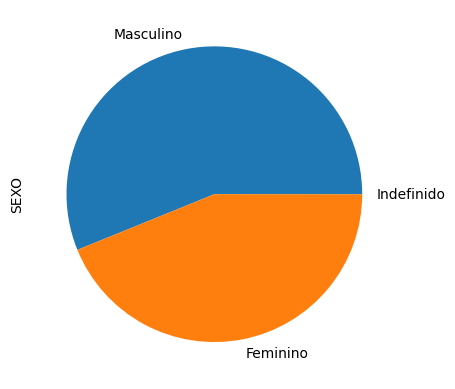

In [ ]:
dados.SEXO.value_counts(normalize=True).plot(kind='pie')

<Axes: >

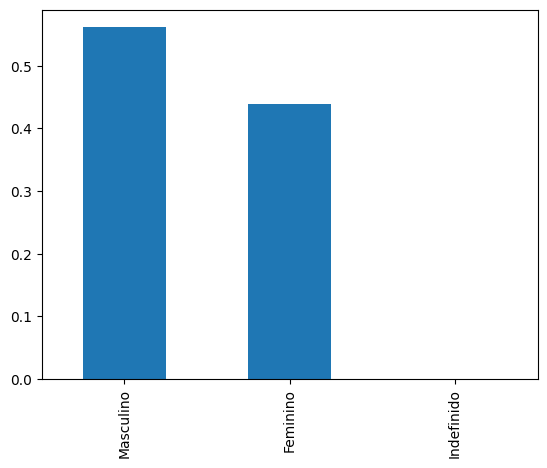

In [ ]:
dados.SEXO.value_counts(normalize=True).plot(kind='bar')


In [ ]:
dados.RACACOR.value_counts(normalize=True)

1.0    0.506753
4.0    0.395535
2.0    0.088183
3.0    0.006322
5.0    0.003207
Name: RACACOR, dtype: float64

<Axes: >

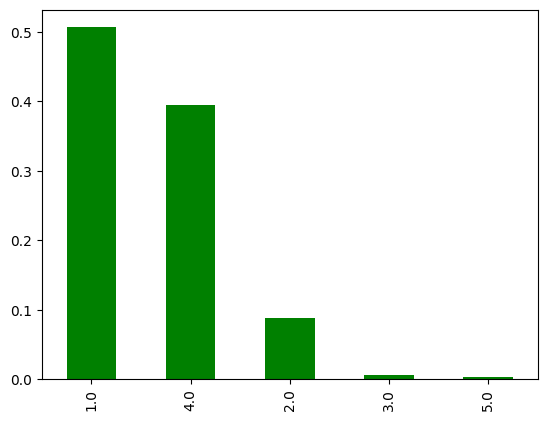

In [ ]:
dados.RACACOR.value_counts(normalize=True).plot(kind='bar', color='green')

RACACOR =Cor informada pelo responsável pelas informações do falecido. (1 – Branca; 2 – Preta; 3 – Amarela; 4 – Parda; 5 – Indígena)

In [ ]:
dados.LOCOCOR.value_counts(normalize=True)

1    0.657882
3    0.212913
2    0.065396
4    0.033415
5    0.029733
9    0.000596
6    0.000066
Name: LOCOCOR, dtype: float64

Local
de ocorrência do óbito. (1 – hospital; 2 – outros
estabelecimentos de
saúde; 3 – domicílio; 4 – via pública; 5 – outros; 6 - aldeia indígena; 9
–
ignorado).


In [ ]:
dados.CODMUNRES.value_counts(normalize=True)

355030    5.976605e-02
330455    4.618238e-02
292740    1.368610e-02
230440    1.355216e-02
310620    1.181743e-02
              ...     
230000    1.313193e-06
240000    1.313193e-06
280000    6.565967e-07
270000    6.565967e-07
140000    6.565967e-07
Name: CODMUNRES, Length: 5594, dtype: float64

355030  Código IBGE Munícipio São Paulo

2408102 Código IBGE Munícipio Natal

In [ ]:

dados.query('CODMUNRES==240810' ,inplace=True)

In [ ]:
dados.shape

(6240, 15)

In [ ]:
miIdade2 = dados['IDADE2'].min()
miIdade2

1

In [ ]:
maxIdade2 = dados['IDADE2'].max()
maxIdade2

114

In [ ]:
dados.to_csv("planilha_obitos_covid_natal2022.csv")

# #selecionando as colunas com o tipo "object"

In [ ]:
colunas=dados.dtypes[dados.dtypes.values=='object'].index

In [ ]:
dados=dados.drop(colunas,axis=1)

#eliminando essas colunas

In [ ]:
dados=dados.dropna()

In [ ]:
dados.head()

,CODMUNNATU,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,IDADE2,COVID
1004399,330455.0,1,4.0,1.0,1.0,0.0,999993.0,240810,2,240810,81,False
1004400,240720.0,1,3.0,2.0,3.0,2.0,213405.0,240810,2,240810,74,False
1004401,240810.0,2,2.0,1.0,4.0,3.0,411010.0,240810,2,240810,60,False
1004403,240260.0,1,4.0,9.0,2.0,1.0,513205.0,240810,3,240810,58,False
1004406,240310.0,2,1.0,2.0,4.0,3.0,999992.0,240810,1,240810,72,False


Uma forma muito boa de entender as suas variáveis categóricas é utilizando o comando nunique(), ele irá te mostrar quantos valores únicos existem para cada coluna.

In [ ]:
dados = dados.drop('CAUSABAS', axis=1)


In [ ]:
 dados = dados.drop('ATESTADO', axis=1)

In [ ]:
 dados = dados.drop('IDADE', axis=1)

In [ ]:
dados.head()

,CODMUNNATU,SEXO,RACACOR,ESTCIV,ESC,ESC2010,OCUP,CODMUNRES,LOCOCOR,CODMUNOCOR,IDADE2,COVID
1004399,330455.0,1,4.0,1.0,1.0,0.0,999993.0,240810,2,240810,81,False
1004400,240720.0,1,3.0,2.0,3.0,2.0,213405.0,240810,2,240810,74,False
1004401,240810.0,2,2.0,1.0,4.0,3.0,411010.0,240810,2,240810,60,False
1004402,241310.0,2,4.0,2.0,2.0,1.0,NaN,240810,2,240810,76,False
1004403,240260.0,1,4.0,9.0,2.0,1.0,513205.0,240810,3,240810,58,False


In [ ]:
dados.nunique()

CODMUNNATU    452
IDADE         109
SEXO            2
RACACOR         5
ESTCIV          6
ESC             6
ESC2010         7
OCUP          254
CODMUNRES       1
LOCOCOR         6
CODMUNOCOR     51
IDADE2        109
COVID           2
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Modelos de Classificação**


Em modelos de classificação estamos tentando prever o valor de uma categoria
Podemos usar algoritmos como árvore de classificação, KNN, SVM

Scikit-Learn
(Ferramentas simples e eficientes para análise preditiva de dados)

**Utilizando o KNN**



In [ ]:
 #Bibliotecas para Processamento de dados
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#definindo o X e o Y para o treino ** Separando características de entrada e de saída
x = dados.drop('COVID', axis=1)
y = dados.COVID

In [ ]:
# Exibir as primeiras linhas de X e y
print("Características de entrada (x):")
print(x)
print("\nVariável de saída/covid (y):")
print(y)

Características de entrada (x):
         CODMUNNATU  SEXO  RACACOR  ESTCIV  ESC  ESC2010      OCUP  CODMUNRES  \
1004399    330455.0     1      4.0     1.0  1.0      0.0  999993.0     240810   
1004400    240720.0     1      3.0     2.0  3.0      2.0  213405.0     240810   
1004401    240810.0     2      2.0     1.0  4.0      3.0  411010.0     240810   
1004403    240260.0     1      4.0     9.0  2.0      1.0  513205.0     240810   
1004406    240310.0     2      1.0     2.0  4.0      3.0  999992.0     240810   
...             ...   ...      ...     ...  ...      ...       ...        ...   
1028981    240800.0     2      1.0     3.0  2.0      1.0  999992.0     240810   
1028982    261160.0     2      1.0     2.0  4.0      3.0  999993.0     240810   
1028991    241140.0     1      4.0     2.0  2.0      1.0  715210.0     240810   
1028992    241120.0     2      4.0     1.0  3.0      1.0  999993.0     240810   
1028993    240810.0     1      4.0     2.0  3.0      1.0  999993.0     240810

In [ ]:
clArvore =tree.DecisionTreeClassifier()

In [ ]:
clArvore = clArvore.fit(x,y)

In [ ]:
#Dividindo os dados em Treino e Teste

Árvore de Decisão

In [ ]:
#importando o KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#criando classificador
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Avaliando o modelo
#neigh.score(x, y)

**Utilizando a Árvore de Decisão**

---



In [ ]:
#Importando a árvore de decisão
from sklearn import tree

In [ ]:
# Criando o nosso classificador
clfArvore = tree.DecisionTreeClassifier()

In [ ]:
# Fazendo o fit com os dados
clfArvore = clfArvore.fit(x, y)

In [ ]:
# Avaliando o modelo
clfArvore.score(x,y)

0.9990627928772259

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pontuacoes = cross_val_score(clfArvore, x, y, cv=20)

In [ ]:
pontuacoes_percentuais = pontuacoes * 100

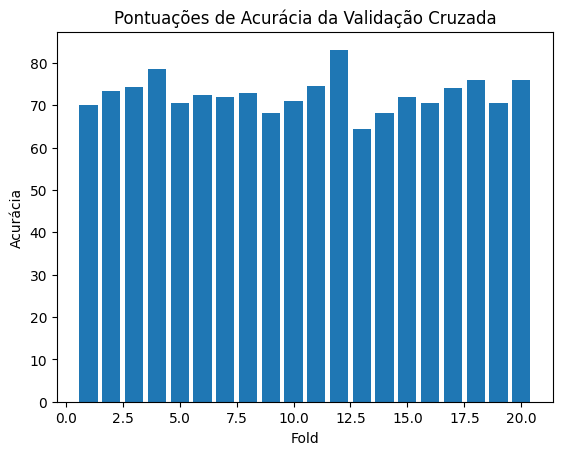

In [ ]:
plt.bar(range(1, len(pontuacoes_percentuais) + 1), pontuacoes_percentuais)
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.title('Pontuações de Acurácia da Validação Cruzada')
plt.show()

**Utilizando a Regressão Logística**

In [ ]:
# Importando a regressão logística
from sklearn.linear_model import LogisticRegression

In [ ]:
# Criando o nosso classificador # Fazendo o fit com os dados
clfLog = LogisticRegression(random_state=0, max_iter=1000).fit(x, y)

In [ ]:
# Avaliando o modelo
clfLog.score(x,y)

0.8317713214620431

**Avaliando modelos de classificação**
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
Para isso, vamos usar os dados de teste

Tentar entender quais variavéis desse conjunto de dados são mais relevantes ao óbito por cid/doença.





* ATESTADO = CIDs informados no atestado. (Códigos CID 10)
* CID B34.2 – INFECÇÃO POR CORONAVÍRUS DE LOCALIZAÇÃO NÃO ESPECIFICADA
* IDADE
* INSTRUCAO = Instrução, conforme a tabela: 1979 (C 9)
 * 0: Ignorado
 *1: Nenhuma
 *2: Primeiro grau
 *3: Segundo grau
 *4: Superior
* OCUPACAO =Ocupação, conforme a Classificação Brasileira de Ocupações (CBO)
* RACACOR =Cor informada pelo responsável pelas informações do falecido. (1 – Branca; 2
– Preta; 3 – Amarela; 4 – Parda; 5 – Indígena)
* SEXO =Sexo do falecido. “Ignorado” selecionada em casos especiais como cadáveres mutilados, em estado avançado de decomposição, genitália indefinida ou hermafroditismo. (M – masculino; F – feminino; I - ignorado)





C34 - Neoplasia Maligna dos Brônquios e dos Pulmões
C18 Neoplasia maligna do cólon
C22 - Neoplasia maligna do fígado e das vias biliares intra-hepáticas
C16 - Neoplasia maligna do estômago
C50 – Neoplasia Maligna da Mama

LINHAAA = CIDs informados na Linha
A da DO referente ao diagnóstico na Linha A da
DO (causa terminal - doença ou estado mórbido que causou diretamente
a
morte). (Códigos CID 10